In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [28]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Importação e limpeza dos dados

In [29]:
dataset = pd.read_csv('Student Mental health.csv')
dataset.drop('Timestamp', axis = 1, inplace = True) 


In [30]:
a_renomear = {'Choose your gender': 'Gênero',
             'Age': 'Idade',
             'What is your course?': 'Curso',
             'Your current year of Study': 'Tempo atual de estudo',
             'What is your CGPA?': 'CGPA',
             'Marital status': 'Estado cívil',
             'Do you have Depression?': 'Você tem depressão?',
             'Do you have Anxiety?': 'Você tem ansiedade?',
             'Do you have Panic attack?': 'Você tem ataque de pânico?',
             'Did you seek any specialist for a treatment?': 'Você já procurou tratamento?'}

dataset = dataset.rename(columns = a_renomear)

In [31]:
dataset.dropna(subset = ['Idade'], inplace = True)
dataset.Idade = dataset.Idade.apply(np.int64)


In [32]:
renomear_genero = {'Female': 'Feminino', 'Male': 'Masculino'}

renomear_tempo_estudo = {
    'year 1': 1,
    'year 2': 2,
    'Year 1': 1,
    'year 3': 3,
    'year 4': 4,
    'Year 2': 2,
    'Year 3': 3
}

renomear_estado_civil = {
    'No': 'Solteiro(a)',
    'Yes': 'Casado(a)'
}

renomear_sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

renomear_cgpa = {
    '3.00 - 3.49': 'B',
    '3.50 - 4.00': 'A',
    '3.50 - 4.00 ': 'A',
    '2.50 - 2.99': 'C',
    '2.00 - 2.49': 'D',
    '0 - 1.99': 'E'
}

dataset.CGPA = dataset.CGPA.map(renomear_cgpa)
dataset['Você tem depressão?'] = dataset['Você tem depressão?'].map(renomear_sim_nao)
dataset['Você tem ansiedade?'] = dataset['Você tem ansiedade?'].map(renomear_sim_nao)
dataset['Você tem ataque de pânico?'] = dataset['Você tem ataque de pânico?'].map(renomear_sim_nao)
dataset['Você já procurou tratamento?'] = dataset['Você já procurou tratamento?'].map(renomear_sim_nao)
dataset.head()
dataset['Gênero'] = dataset['Gênero'].map(renomear_genero)
dataset['Tempo atual de estudo'] = dataset['Tempo atual de estudo'].map(renomear_tempo_estudo)
dataset['Estado cívil'] = dataset['Estado cívil'].map(renomear_estado_civil)


In [33]:

renomear_cursos = { 
    'Engineering': 'Engenharia',
    'Islamic education': 'Educação Islâmica',
    'BIT': 'Bacharelado em Tecnologia da Informação',
    'Laws': 'Direito',
    'Mathemathics': 'Matemática',
    'Pendidikan islam':'Estudos Eslâmicos',
    'BCS': 'Ciência da Computação',
    'Human Resources': 'Recursos Humanos',
    'Irkhs': 'Conhecimento Islâmico Revelado',
    'Psychology': 'Psicologia',
    'KENMS': 'Economia e Administração',
    'Accounting ': 'Contabilidade',
    'ENM': 'Empreendedorismo',
    'Marine science': 'Ciência Marinha',
    'KOE': 'Engenharia',
    'Banking Studies': 'Estudos Bancários',
    'Business Administration': 'Administração',
    'Law': 'Direito',
    'KIRKHS': 'Conhecimento Islâmico Revelado',
    'Usuluddin ': 'Estudos Eslâmicos',
    'TAASL': 'Atleta',
    'Engine': 'Engenharia',
    'ALA': 'Biblioteconomia',
    'Biomedical science': 'Biomedicina',
    'koe': 'Engenharia',
    'Kirkhs': 'Conhecimento Islâmico Revelado',
    'BENL': 'Ciências Humanas',
    'Benl': 'Ciências Humanas',
    'IT': 'Tecnologia da Informação',
    'CTS': 'Tecnologia da Informação',
    'Biotechnology': 'Biotecnologia',
    'Communication ': 'Comunicação',
    'Diploma Nursing': 'Enfermagem',
    'Pendidikan Islam ': 'Estudos Eslâmicos',
    'Radiography': 'Radioterapia',
    'psychology': 'Psicologia',
    'Fiqh fatwa ': 'Direito',
    'DIPLOMA TESL': 'Inglês',
    'Koe': 'Engenharia',
    'Fiqh': 'Direito',
    'Islamic Education': 'Educação Islâmica',
    'Nursing ': 'Enfermagem',
    'Pendidikan Islam':'Estudos Eslâmicos',
    'engin': 'Engenharia',
    'Econs': 'Economia',
    'MHSC': 'Ciências da Saúde',
    'Kop': 'Psicologia',
    'Human Sciences ': 'Ciências Humanas',
    'Malcom': 'História'
}
dataset.Curso = dataset.Curso.map(renomear_cursos)
dataset.head()

,Gênero,Idade,Curso,Tempo atual de estudo,CGPA,Estado cívil,Você tem depressão?,Você tem ansiedade?,Você tem ataque de pânico?,Você já procurou tratamento?
0,Feminino,18,Engenharia,1,B,Solteiro(a),Sim,Não,Sim,Não
1,Masculino,21,Educação Islâmica,2,B,Solteiro(a),Não,Sim,Não,Não
2,Masculino,19,Bacharelado em Tecnologia da Informação,1,B,Solteiro(a),Sim,Sim,Sim,Não
3,Feminino,22,Direito,3,B,Casado(a),Sim,Não,Não,Não
4,Masculino,23,Matemática,4,B,Solteiro(a),Não,Não,Não,Não


## Análise de casos de depressão

In [34]:
depressao_genero = pd.crosstab(dataset['Gênero'],
                              dataset['Você tem depressão?'],
                              )
depressao_genero['Total'] = depressao_genero.sum(axis=1)

depressao_genero['Não %'] = ((depressao_genero['Não']/depressao_genero['Total'])*100).round(2)
depressao_genero['Sim %'] = ((depressao_genero['Sim']/depressao_genero['Total'])*100).round(2)


<AxesSubplot:title={'center':'Porcentagem de mulheres que sofrem com depressão'}, ylabel='Feminino'>

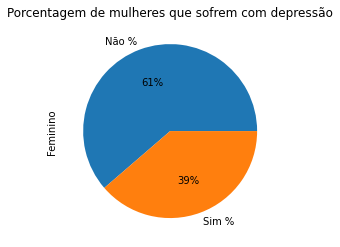

In [35]:
grafico_feminino = depressao_genero.loc['Feminino']
grafico_feminino = grafico_feminino['Não %':'Sim %']
grafico_feminino.plot(kind = 'pie', 
                      title = 'Porcentagem de mulheres que sofrem com depressão', 
                      autopct = '%1.0f%%'
                     )

<AxesSubplot:title={'center':'Porcentagem de Homens que sofrem com depressão'}, ylabel='Masculino'>

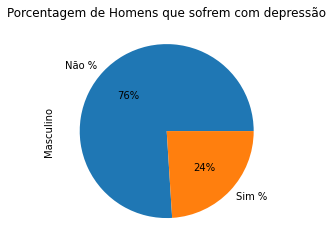

In [36]:
grafico_masculino = depressao_genero.loc['Masculino']
grafico_masculino = grafico_masculino['Não %':'Sim %']
grafico_masculino.plot(kind = 'pie', title = 'Porcentagem de Homens que sofrem com depressão', autopct = '%1.0f%%')

## Podemos percerber que a porcentagem de mulheres com depressão é superior a de homens

In [37]:
depressao_genero_casamento = pd.crosstab([dataset['Gênero'],dataset['Você tem depressão?']],
                                dataset['Estado cívil']                             ,
                              )
depressao_genero_casamento

Estado cívil                   Casado(a)  Solteiro(a)
Gênero    Você tem depressão?                        
Feminino  Não                          0           46
          Sim                         13           16
Masculino Não                          0           19
          Sim                          3            3

## Podemos perceber que todos as pessoas casadas, dessa amostra, sofrem com a depressão!

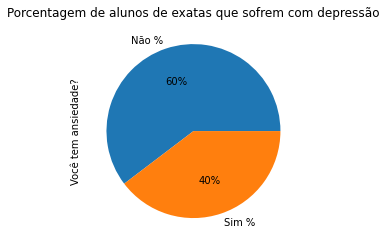

In [38]:
exatas = ['Engenharia', 
          'Bacharelado em Tecnologia da Informação', 
          'Matemática', 'Ciência da Computação', 
          'Tecnologia da Informação',
         'Economia',
          'Contabilidade'
         ]
cursos_exatas = dataset.assign(**{'Exatas': dataset['Curso'].isin(exatas)})
cursos_exatas = cursos_exatas[cursos_exatas['Exatas'] == True]

exatas_depressao = cursos_exatas['Você tem ansiedade?'].value_counts()

exatas_depressao['Total'] = exatas_depressao.sum()

exatas_depressao['Não %'] = ((exatas_depressao['Não']/exatas_depressao['Total'])*100).round(2)
exatas_depressao['Sim %'] = ((exatas_depressao['Sim']/exatas_depressao['Total'])*100).round(2)

exatas_depressao = exatas_depressao['Não %': 'Sim %']
grafico_exatas_depressao = exatas_depressao.plot(kind = 'pie', 
                                                 autopct = '%1.0f%%', 
                                                 title = 'Porcentagem de alunos de exatas que sofrem com depressão')

## Idade média dos estudantes com depressão. 

In [39]:
dataset.head()

,Gênero,Idade,Curso,Tempo atual de estudo,CGPA,Estado cívil,Você tem depressão?,Você tem ansiedade?,Você tem ataque de pânico?,Você já procurou tratamento?
0,Feminino,18,Engenharia,1,B,Solteiro(a),Sim,Não,Sim,Não
1,Masculino,21,Educação Islâmica,2,B,Solteiro(a),Não,Sim,Não,Não
2,Masculino,19,Bacharelado em Tecnologia da Informação,1,B,Solteiro(a),Sim,Sim,Sim,Não
3,Feminino,22,Direito,3,B,Casado(a),Sim,Não,Não,Não
4,Masculino,23,Matemática,4,B,Solteiro(a),Não,Não,Não,Não


In [40]:
estudantes_depressao = dataset[dataset['Você tem depressão?'] == 'Sim']
estudantes_depressao.head()

,Gênero,Idade,Curso,Tempo atual de estudo,CGPA,Estado cívil,Você tem depressão?,Você tem ansiedade?,Você tem ataque de pânico?,Você já procurou tratamento?
0,Feminino,18,Engenharia,1,B,Solteiro(a),Sim,Não,Sim,Não
2,Masculino,19,Bacharelado em Tecnologia da Informação,1,B,Solteiro(a),Sim,Sim,Sim,Não
3,Feminino,22,Direito,3,B,Casado(a),Sim,Não,Não,Não
6,Feminino,23,Estudos Eslâmicos,2,A,Casado(a),Sim,Não,Sim,Não
11,Feminino,24,Engenharia,3,A,Casado(a),Sim,Não,Não,Não


In [41]:
estudantes_depressao.Idade.describe()

count    35.000000
mean     20.285714
std       2.395724
min      18.000000
25%      18.000000
50%      19.000000
75%      23.000000
max      24.000000
Name: Idade, dtype: float64

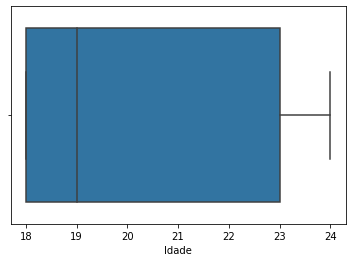

In [42]:
grafico_idade_depressao = sns.boxplot(x  = 'Idade', data = estudantes_depressao, orient = 'h')

## Podemos ver que a vaiável Idade é assimétrica a direita e não possui outliers relevantes.

In [43]:
idade_media = estudantes_depressao.Idade.mean()
round(idade_media)

20

In [44]:
print(f'A idade média dos alunos que sofrem com depresão é de {round(idade_media)} anos.')

A idade média dos alunos que sofrem com depresão é de 20 anos.


In [45]:
from scipy.stats import ranksums

In [46]:
depressao = dataset['Você tem depressão?']
ataque_panico = dataset['Você tem ataque de pânico?']
ansiedade = dataset['Você tem ansiedade?']

ranksums(depressao, ataque_panico)

RanksumsResult(statistic=0.24433888871261045, pvalue=0.806968367170738)

In [47]:
ranksums(depressao, ansiedade)

RanksumsResult(statistic=0.12216944435630522, pvalue=0.9027648250246225)

In [48]:
ranksums(ansiedade, ataque_panico)

RanksumsResult(statistic=0.12216944435630522, pvalue=0.9027648250246225)

## Como o p-value de todos os casos foram superiores a 0.8, posso considerar que as análises feitas pelos casos envolvendo depressão seriam muito semelhantes para ansiedade e ataque de pânico.

## Criando um modelo de previsões

In [49]:
dataset_previsao = dataset.copy()


In [50]:
renomear_sim_nao_previsao = {
    'Sim': 1 ,
    'Não': 0
}

renomear_cgpa = {
    'B': 5 ,
    'A': 4 ,
    'C': 2 ,
    'D': 1 ,
    'E': 0 ,
    
}

renomear_estado_civil = {
    'Solteiro(a)': 0 ,
    'Casado(a)': 1 
}

renomear_genero = {'Feminino': 1 , 
                   'Masculino': 0}

renomear_curso = {
    'Engenharia': 0,
    'Educação Islâmica': 1,
    'Bacharelado em Tecnologia da Informação': 2,
    'Direito': 3,
    'Matemática': 4,
    'Estudos Eslâmicos': 5,
    'Ciência da Computação': 6,
    'Recursos Humanos': 7,
    'Conhecimento Islâmico Revelado': 8,
    'Psicologia': 9,
    'Economia e Administração': 10,
    'Contabilidade': 11,
    'Empreendedorismo': 12,
    'Ciência Marinha': 13,
    'Estudos Bancários': 14,
    'Administração': 15,
    'Atleta': 16,
    'Biblioteconomia': 17,
    'Biomedicina': 18,
    'Ciências Humanas': 19,
    'Tecnologia da Informação': 20,
    'Economia': 21,
    'Ciências da Saúde': 22,
    'História': 23,
    'Biotecnologia': 24,
    'Comunicação': 25,
    'Enfermagem': 26,
    'Radioterapia': 27,
    'Inglês': 28
}


dataset_previsao['Gênero'] = dataset_previsao['Gênero'].map(renomear_genero)
dataset_previsao.CGPA = dataset_previsao.CGPA.map(renomear_cgpa)
dataset_previsao['Estado cívil'] = dataset_previsao['Estado cívil'].map(renomear_estado_civil)
dataset_previsao['Você tem depressão?'] = dataset_previsao['Você tem depressão?'].map(renomear_sim_nao_previsao)
dataset_previsao['Você tem ansiedade?'] = dataset_previsao['Você tem ansiedade?'].map(renomear_sim_nao_previsao)
dataset_previsao['Você tem ataque de pânico?'] = dataset_previsao['Você tem ataque de pânico?'].map(renomear_sim_nao_previsao)

dataset_previsao['Curso'] = dataset_previsao['Curso'].map(renomear_curso) 

dataset_previsao = dataset_previsao.drop('Você já procurou tratamento?', axis=1)

dataset_previsao.head()

,Gênero,Idade,Curso,Tempo atual de estudo,CGPA,Estado cívil,Você tem depressão?,Você tem ansiedade?,Você tem ataque de pânico?
0,1,18,0,1,5,0,1,0,1
1,0,21,1,2,5,0,0,1,0
2,0,19,2,1,5,0,1,1,1
3,1,22,3,3,5,1,1,0,0
4,0,23,4,4,5,0,0,0,0


In [51]:
x = dataset_previsao[['Gênero', 
                      'Idade', 
                      'Curso', 
                      'Tempo atual de estudo', 
                      'CGPA', 'Estado cívil', 
                      'Você tem ansiedade?',
                      'Você tem ataque de pânico?']]
y = dataset_previsao['Você tem depressão?']

In [52]:

SEED = 5
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))



modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 75 elementos e testaremos com 25 elementos
A acurácia foi 80.00%
